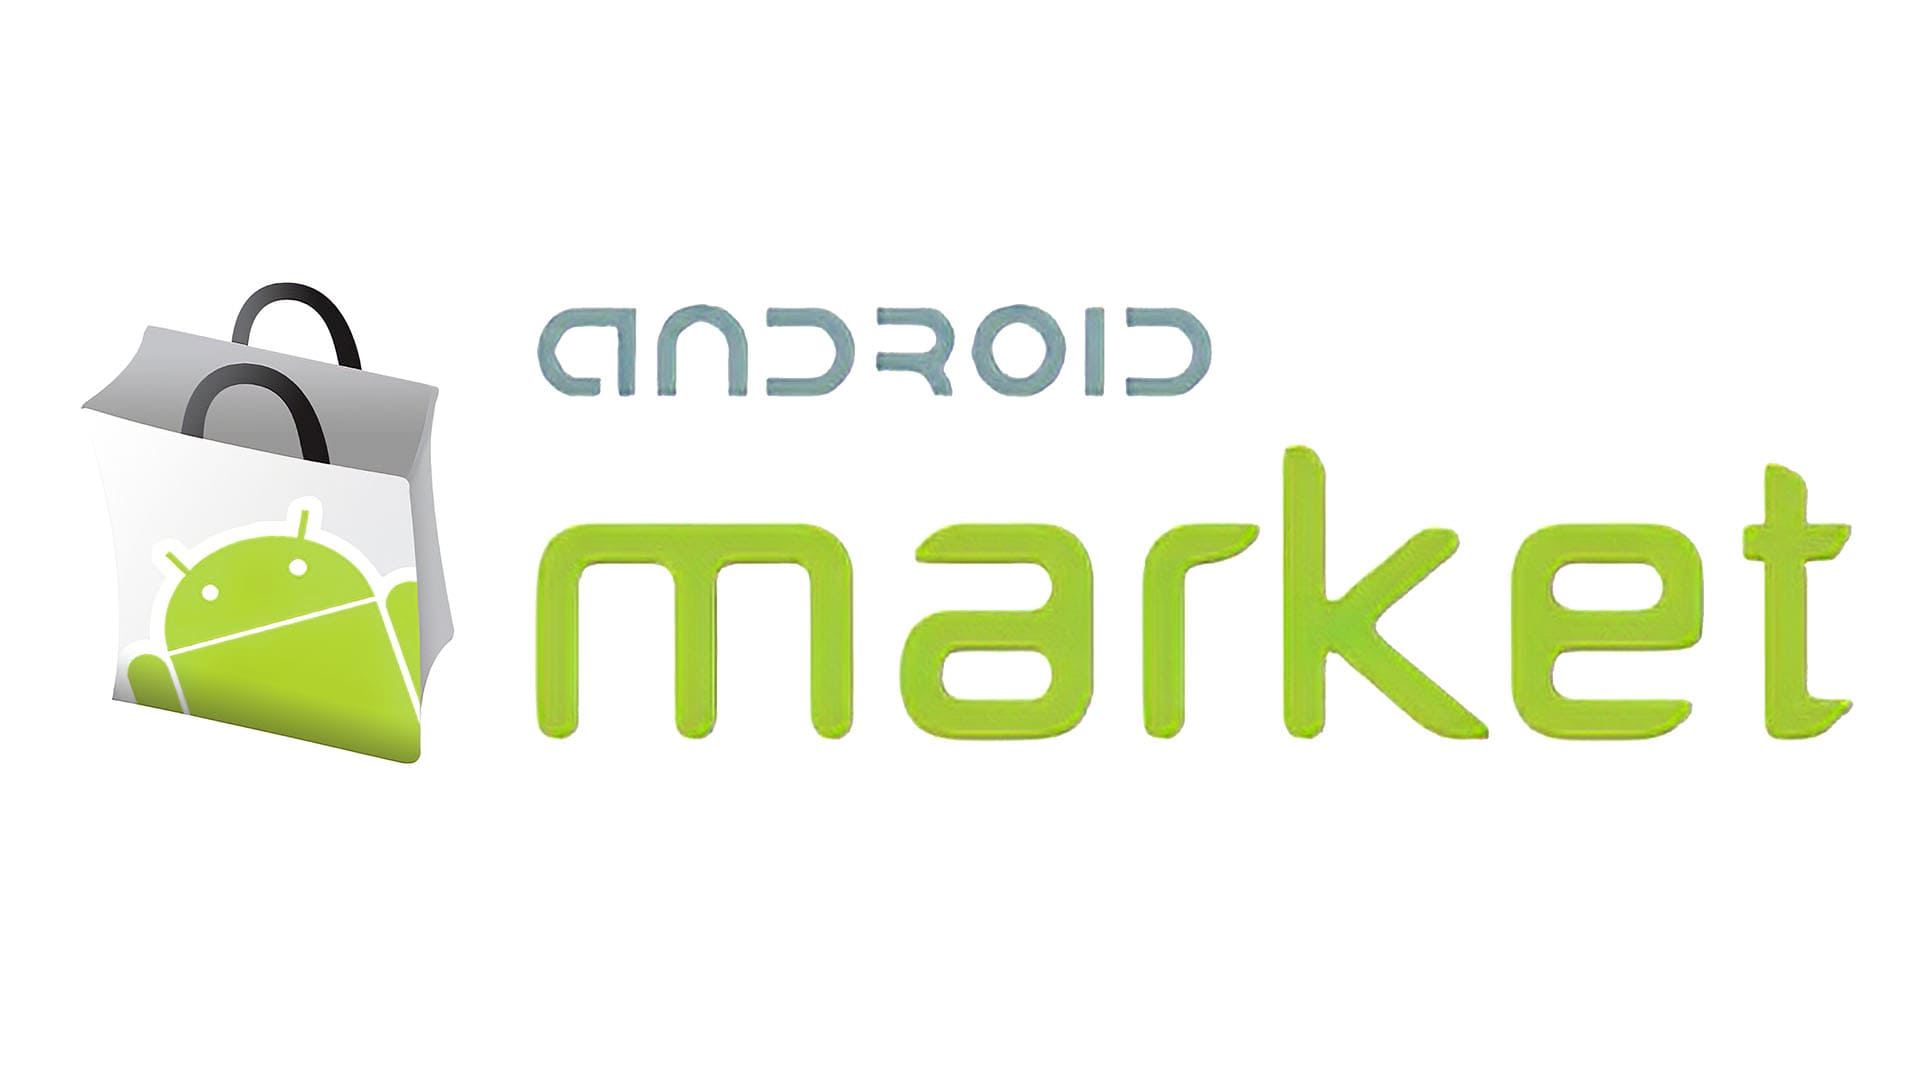

**UNVEILING THE ANDROID APP MARKET: ANALYZING GOOGLE PLAY STORE DATA**


**Introduction**

This project delves into the Android app market by analyzing data from the Google Play Store. We aim to understand app distribution across categories, analyze key metrics like ratings and reviews, and potentially explore user sentiment through reviews. The goal is to uncover insights into market trends, user preferences, and the competitive landscape of the Android app ecosystem.

**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. **Data Loading and Initial Exploration**

Reasoning:

* We begin by importing the pandas library for data manipulation.
* The read_csv function is used to load your CSV files into pandas DataFrames. Replace the file names with the actual names of your files.
* info() provides an overview of the data structure, including data types and missing values.
* head() shows the first few rows, giving you a glimpse of the data.

In [ ]:
import pandas as pd

# Load the datasets, specifying the encoding
apps = pd.read_csv('/content/drive/MyDrive/Unveiling_the_Android_App_Market/apps.csv', encoding='latin1')
reviews = pd.read_csv('/content/drive/MyDrive/Unveiling_the_Android_App_Market/user_reviews.csv', encoding='latin1')

In [ ]:
# Display basic information about the datasets
print(apps.info())
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns

In [ ]:
# View the first few rows of each dataset
print(apps.head())
print(reviews.head())

   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite ?? FREE Live Cool Themes, Hid...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres Last Updated         Current Ver  \
0       Everyone               Art & Design     7-Jan-18               1.0.0   
1       Everyone

2. **Data Cleaning and Preprocessing**

In [ ]:
# Check for missing values

print(apps.isnull().sum())

Unnamed: 0           0
App                  0
Category             0
Rating               0
Reviews              0
Size              1169
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          4
Android Ver          2
dtype: int64


In [ ]:
# Check for missing values

print(reviews.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [ ]:
apps.loc[apps['Type'].isnull(), 'Type'] = 'Free'

3. **Category Exploration**

Reasoning:

* seaborn.countplot is a convenient way to create a bar chart for categorical data.
* order=apps['Category'].value_counts().index ensures that the bars are sorted in descending order of frequency, making it easier to see the most common categories.
* plt.xticks(rotation=90) rotates the x-axis labels to prevent overlapping.

Graph Explanation:

* "The analysis of the app distribution reveals a striking trend: the 'Family' category boasts the largest number of apps, surpassing even popular categories like 'Game' and 'Tools'.
* This highlights a significant and potentially growing user demand for family-oriented apps.
* While 'Game' and 'Tools' categories also hold a considerable number of apps, indicating their own areas of user interest, the dominance of the 'Family' category is notable.
* Categories like 'Beauty' and 'Comics' have fewer apps, suggesting they cater to niche markets with potentially less competition.
* The relatively large number of apps in the 'Education' category further suggests a rising interest in educational resources on the platform.
* However, developers should be aware that popular categories, especially 'Family', are likely to be highly competitive, requiring them to prioritize unique features, quality content, and effective marketing strategies to stand out."

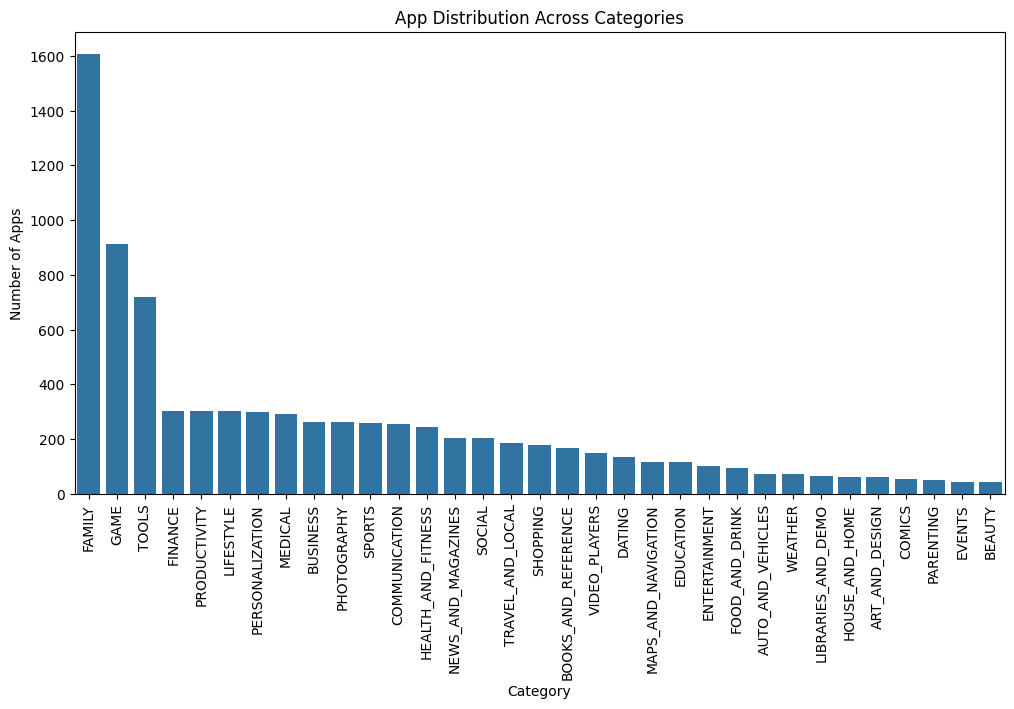

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.countplot(x='Category', data=apps, order=apps['Category'].value_counts().index)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.title('App Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.show()

**4. Metrics Analysis**

* Examine app ratings:

Visualize the distribution of app ratings using histograms (sns.histplot or plt.hist). Calculate summary statistics (mean, median, standard deviation) to understand the overall rating trends.
* Analyze app sizes and pricing:

Investigate the relationship between app size and rating, or between price and rating. Use scatter plots (sns.scatterplot or plt.scatter) to visualize these relationships.
* Explore popularity metrics:

Analyze the number of reviews and installs for apps. You might find that popular apps tend to have higher ratings or certain categories attract more users.

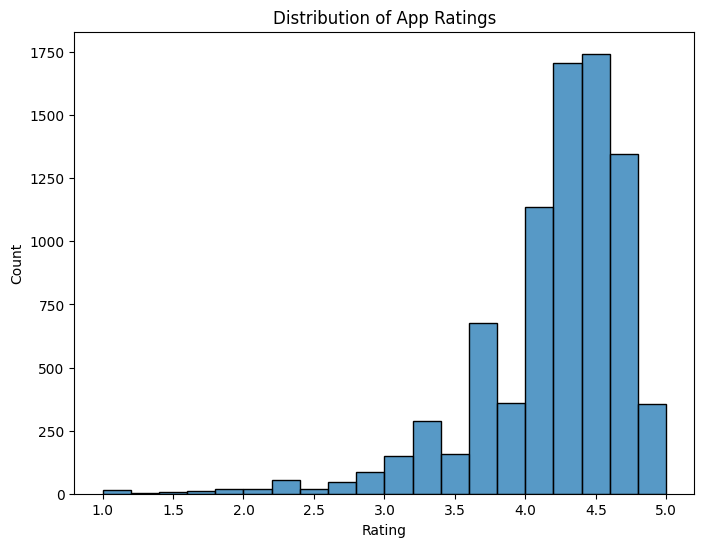

In [ ]:
# Analyzing ratings
plt.figure(figsize=(8, 6))
sns.histplot(apps['Rating'], bins=20)
plt.title('Distribution of App Ratings')
plt.show()


**5. Sentiment Analysis :**

* Process and analyze user reviews: If user review data, use sentiment analysis techniques (e.g., TextBlob) to determine the overall sentiment (positive, negative, neutral) expressed in the reviews.
* Relate sentiment to other metrics: Explore how sentiment relates to app ratings, category, or other characteristics. Do apps with positive reviews tend to have higher ratings?

After Applying

After applying the function,reviews DataFrame will have a new 'Sentiment' column containing the sentiment scores for each review. You can then use this column for further analysis, such as:

* Analyzing sentiment distribution:

Create histograms or density plots to visualize the distribution of sentiment scores across all reviews.
* Comparing sentiment across categories:

Group reviews by app category and calculate the average sentiment score for each category.
* Correlating sentiment with ratings:

See if there's a relationship between user sentiment and app ratings.
* Identifying positive and negative reviews:

Filter reviews based on sentiment scores to identify the most positive and negative feedback.

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [ ]:
reviews['Sentiment'] = reviews['Translated_Review'].astype(str).apply(get_sentiment)

App
10 Best Foods for You                                                         0.456611
104 ??ú«? - ??ú«? ????ú ???¬ú ñ?ú¦ ñ?ú?§????    0.392405
11st                                                                          0.181294
1800 Contacts - Lens Store                                                    0.318145
1LINE ?? One Line with One Touch                                             0.186476
                                                                                ...   
Hotspot Shield Free VPN Proxy & Wi-Fi Security                                0.214000
Hotstar                                                                       0.030542
Hotwire Hotel & Car Rental App                                                0.154299
Housing-Real Estate & Property                                               -0.011249
Houzz Interior Design Ideas                                                   0.000000
Name: Sentiment, Length: 1074, dtype: f

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 134 (\x86) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 132 (\x84) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 138 (\x8a) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing 

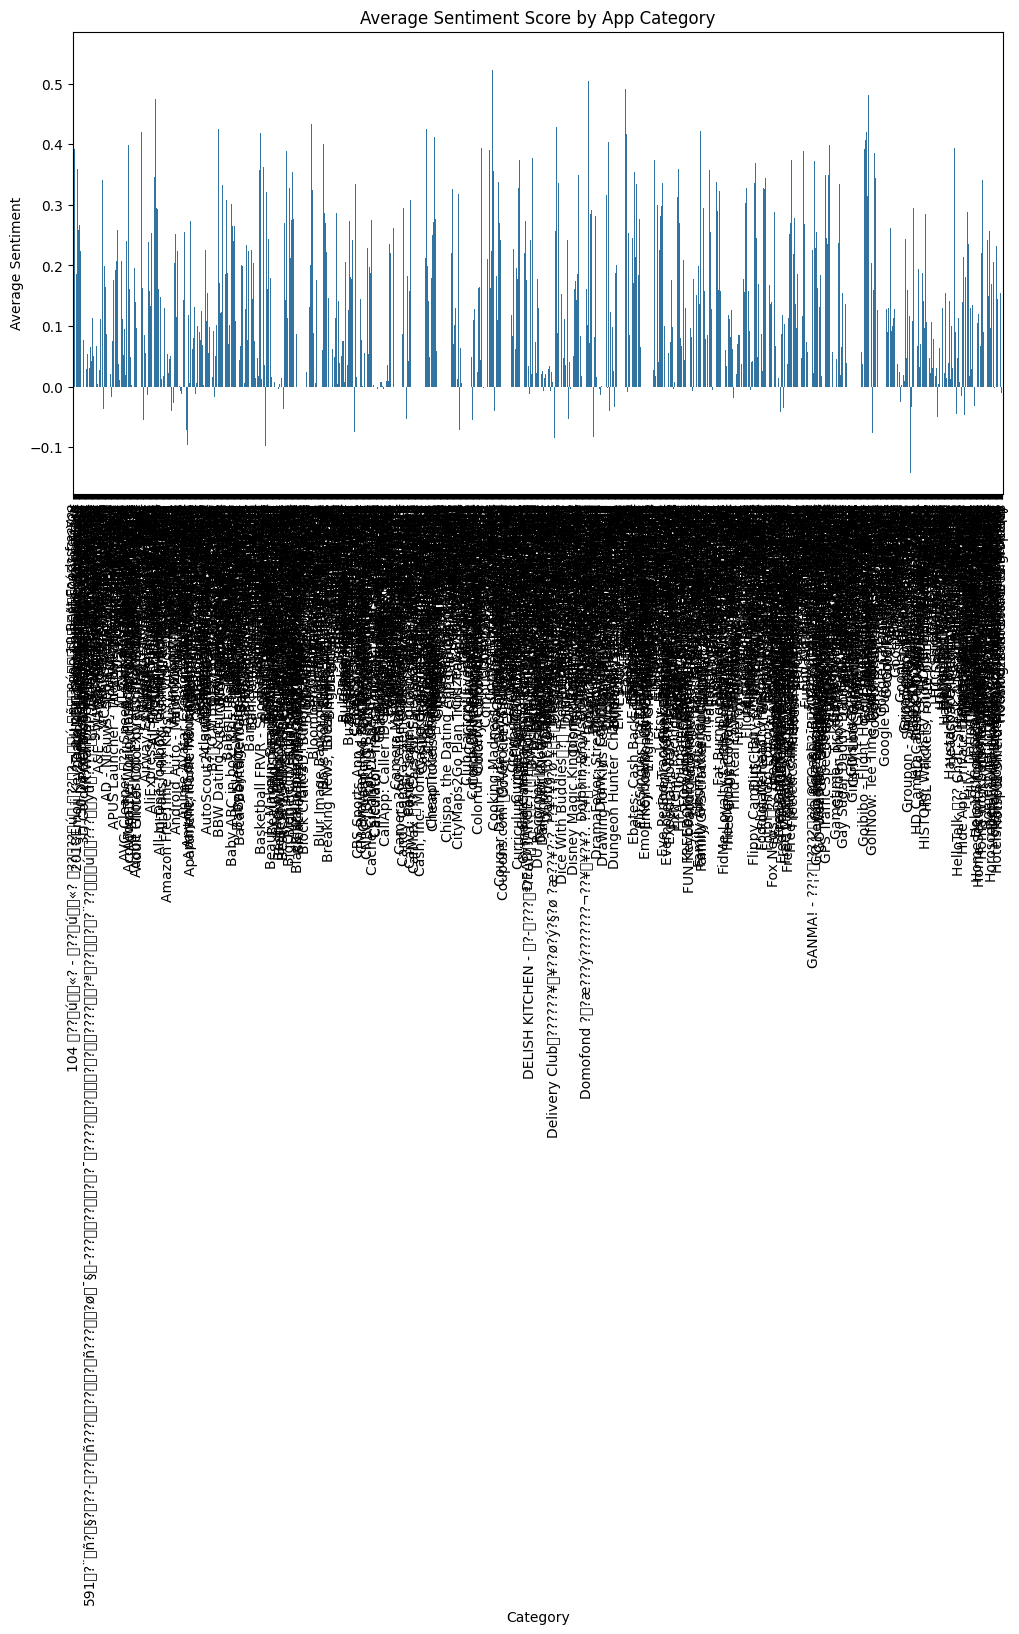

In [ ]:
category_sentiment = reviews.groupby('App')['Sentiment'].mean()
print(category_sentiment)

# Visualize using a bar plot:
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sentiment.index, y=category_sentiment.values)
plt.xticks(rotation=90)
plt.title('Average Sentiment Score by App Category')
plt.xlabel('Category')
plt.ylabel('Average Sentiment')
plt.show()

**6. Interactive Visualization**

Reasoning:

* plotly.express is used for creating interactive visualizations.
* You can customize the plot with different variables, colors, and hover data.
* Explore other interactive visualization libraries for more advanced options.

In [ ]:
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(apps, x='Rating', y='Reviews', color='Category', hover_data=['App'])
fig.show()


**Project Outcomes:**

* Understanding App Distribution:

Identify popular app categories and potential niche markets within the Google Play Store.
* Analyzing App Metrics:

Evaluate app ratings, review counts, and other metrics to understand factors that contribute to app success.
* Unveiling User Sentiment:

Explore user sentiment through review analysis to gain insights into app strengths and weaknesses.
* Visualizing Insights:

Present findings through clear and informative visualizations, including bar charts, histograms, scatter plots, and potentially interactive dashboards.
* Drawing Actionable Conclusions:

Summarize key observations and insights that can inform app development strategies and market understanding.